In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from config import weather_api_key
import requests
from pprint import pprint
import datetime
import time

In [2]:
#Create a list of 1500 and latitues and longitudes
lats=np.random.uniform(-90,90, size=5000)
lngs=np.random.uniform(-180,180,size=5000)
lats_lngs=zip(lats,lngs)


In [3]:
#Add the zipped object into a list
coordinates=list(lats_lngs)


In [4]:
#Find cities from coordinates
cities=[]

for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
#print(cities)

In [5]:
city_data=[]  #list to store the weather data
set_count=1
record_count=1
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [ ]:
#Get the weather info for the cities from the "open weather website" using the open weather key
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes
    if(i%50 ==0 and i>= 50):
        set_count=set_count+1
        record_count=1
    city_url= url+"&q="+city.replace(" ","+")
    #print(city_url)
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count = record_count +1
    try:
        city_weather=requests.get(city_url).json()
        #pprint(city_weather)
        #Parse the data from json object
        city_lat=city_weather["coord"]["lat"]
        #print(city_lat)
        city_lng = city_weather["coord"]["lon"]
        #print(city_lng)
        city_max_temp = city_weather["main"]["temp_max"]
        #print(city_max_temp)
        city_humidity = city_weather["main"]["humidity"]
        #print(city_humidity)
        city_clouds = city_weather["clouds"]["all"]
        #print(city_clouds)
        city_wind = city_weather["wind"]["speed"]
        #print(city_wind)
        city_country = city_weather["sys"]["country"]
        #print(city_country)
       
        # Convert the date to ISO standard.
        city_date = city_weather["dt"]
        #city_date=city_date.strftime('%Y-%m-%d %H:%M:%S')
        #print(city_date)
        #city_date_new=datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #print(city_date_new)
        # Append the city information into city_data list.
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | saint anthony
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | fairbanks
Processing Record 6 of Set 1 | bathsheba
Processing Record 7 of Set 1 | mezen
Processing Record 8 of Set 1 | otyniya
Processing Record 9 of Set 1 | sakakah
Processing Record 10 of Set 1 | north battleford
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | saint-pierre
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | tombouctou
Processing Record 17 of Set 1 | batemans bay
Processing Record 18 of Set 1 | vestmannaeyjar
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | quelimane
Processing Record 21 of Set 1 | bambous virieux
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | hermanus
Processing Record 24 of Set

Processing Record 37 of Set 4 | dikson
Processing Record 38 of Set 4 | verkhoyansk
Processing Record 39 of Set 4 | maragogi
Processing Record 40 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 41 of Set 4 | renigunta
Processing Record 42 of Set 4 | talnakh
Processing Record 43 of Set 4 | yenagoa
Processing Record 44 of Set 4 | mayumba
Processing Record 45 of Set 4 | chigorodo
Processing Record 46 of Set 4 | walvis bay
Processing Record 47 of Set 4 | floresta
Processing Record 48 of Set 4 | erenhot
Processing Record 49 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 50 of Set 4 | ancud
Processing Record 1 of Set 5 | lebu
Processing Record 2 of Set 5 | sinnamary
Processing Record 3 of Set 5 | mar del plata
Processing Record 4 of Set 5 | broken hill
Processing Record 5 of Set 5 | kurumkan
Processing Record 6 of Set 5 | adrar
Processing Record 7 of Set 5 | agua dulce
Processing Record 8 of Set 5 | mys shmidta
City not found. Skipping...
Processing Reco

Processing Record 29 of Set 8 | monmouth
Processing Record 30 of Set 8 | halalo
City not found. Skipping...
Processing Record 31 of Set 8 | shimoni
Processing Record 32 of Set 8 | rongcheng
Processing Record 33 of Set 8 | nuristan
Processing Record 34 of Set 8 | salinopolis
Processing Record 35 of Set 8 | ryotsu
Processing Record 36 of Set 8 | lukulu
Processing Record 37 of Set 8 | cap malheureux
Processing Record 38 of Set 8 | vila franca do campo
Processing Record 39 of Set 8 | cherskiy
Processing Record 40 of Set 8 | anadyr
Processing Record 41 of Set 8 | izumo
Processing Record 42 of Set 8 | qaqortoq
Processing Record 43 of Set 8 | marica
Processing Record 44 of Set 8 | matagami
Processing Record 45 of Set 8 | agua buena
Processing Record 46 of Set 8 | manoel urbano
Processing Record 47 of Set 8 | storslett
Processing Record 48 of Set 8 | muyezerskiy
Processing Record 49 of Set 8 | brodowski
Processing Record 50 of Set 8 | samusu
City not found. Skipping...
Processing Record 1 of S

Processing Record 14 of Set 12 | mozarlandia
Processing Record 15 of Set 12 | flinders
Processing Record 16 of Set 12 | gujrat
Processing Record 17 of Set 12 | zemio
Processing Record 18 of Set 12 | bay roberts
Processing Record 19 of Set 12 | dunedin
Processing Record 20 of Set 12 | tezu
Processing Record 21 of Set 12 | putai
Processing Record 22 of Set 12 | biysk
Processing Record 23 of Set 12 | yining
Processing Record 24 of Set 12 | byron bay
Processing Record 25 of Set 12 | wenling
Processing Record 26 of Set 12 | uwayl
City not found. Skipping...
Processing Record 27 of Set 12 | magadan
Processing Record 28 of Set 12 | maningrida
Processing Record 29 of Set 12 | sladkovo
Processing Record 30 of Set 12 | hyeres
Processing Record 31 of Set 12 | phuket
Processing Record 32 of Set 12 | sirnak
Processing Record 33 of Set 12 | bahia blanca
Processing Record 34 of Set 12 | lasa
Processing Record 35 of Set 12 | taltal
Processing Record 36 of Set 12 | aflu
City not found. Skipping...
Proc

Processing Record 50 of Set 15 | berbera
Processing Record 1 of Set 16 | flagstaff
Processing Record 2 of Set 16 | nyakahanga
Processing Record 3 of Set 16 | portachuelo
Processing Record 4 of Set 16 | calabozo
Processing Record 5 of Set 16 | biloela
Processing Record 6 of Set 16 | andrelandia
Processing Record 7 of Set 16 | arlit
Processing Record 8 of Set 16 | ornskoldsvik
Processing Record 9 of Set 16 | thinadhoo
Processing Record 10 of Set 16 | hailar
Processing Record 11 of Set 16 | zima
Processing Record 12 of Set 16 | pierre
Processing Record 13 of Set 16 | biak
Processing Record 14 of Set 16 | yagodnoye
Processing Record 15 of Set 16 | hayesville
Processing Record 16 of Set 16 | beyneu
Processing Record 17 of Set 16 | toliary
City not found. Skipping...
Processing Record 18 of Set 16 | teknaf
Processing Record 19 of Set 16 | nesbyen
Processing Record 20 of Set 16 | ondangwa
Processing Record 21 of Set 16 | jyvaskyla
Processing Record 22 of Set 16 | mantua
Processing Record 23 o

Processing Record 42 of Set 19 | dargaville
Processing Record 43 of Set 19 | adiake
Processing Record 44 of Set 19 | zhenjiang
Processing Record 45 of Set 19 | kurilsk
Processing Record 46 of Set 19 | ciudad bolivar
Processing Record 47 of Set 19 | seddon
Processing Record 48 of Set 19 | mukhen
Processing Record 49 of Set 19 | acari
Processing Record 50 of Set 19 | harrisonburg
Processing Record 1 of Set 20 | luba
Processing Record 2 of Set 20 | loubomo
Processing Record 3 of Set 20 | slonim
Processing Record 4 of Set 20 | ekhabi
Processing Record 5 of Set 20 | pingshan
Processing Record 6 of Set 20 | hammerfest
Processing Record 7 of Set 20 | kabin buri
Processing Record 8 of Set 20 | necochea
Processing Record 9 of Set 20 | mananara
Processing Record 10 of Set 20 | urumqi
Processing Record 11 of Set 20 | mahibadhoo
Processing Record 12 of Set 20 | solovetskiy
City not found. Skipping...
Processing Record 13 of Set 20 | sarandi
Processing Record 14 of Set 20 | gangotri
City not found.

Processing Record 27 of Set 23 | envira
Processing Record 28 of Set 23 | san isidro
Processing Record 29 of Set 23 | penzance
Processing Record 30 of Set 23 | berdigestyakh
Processing Record 31 of Set 23 | shetpe
Processing Record 32 of Set 23 | millbrook
Processing Record 33 of Set 23 | mutsamudu
City not found. Skipping...
Processing Record 34 of Set 23 | qostanay
Processing Record 35 of Set 23 | bangassou
Processing Record 36 of Set 23 | dibulla
Processing Record 37 of Set 23 | soe
Processing Record 38 of Set 23 | makakilo city
Processing Record 39 of Set 23 | riyadh
Processing Record 40 of Set 23 | peterhead
Processing Record 41 of Set 23 | lapua
Processing Record 42 of Set 23 | bodden town
Processing Record 43 of Set 23 | mahanoro
Processing Record 44 of Set 23 | alekseyevsk
Processing Record 45 of Set 23 | state college
Processing Record 46 of Set 23 | sisimiut
Processing Record 47 of Set 23 | pasvalys
Processing Record 48 of Set 23 | abhar
Processing Record 49 of Set 23 | kazach

Processing Record 13 of Set 27 | marsaxlokk
Processing Record 14 of Set 27 | laredo
Processing Record 15 of Set 27 | yeppoon
Processing Record 16 of Set 27 | lanigan
Processing Record 17 of Set 27 | copiapo
Processing Record 18 of Set 27 | deshna
City not found. Skipping...
Processing Record 19 of Set 27 | silifke
Processing Record 20 of Set 27 | senneterre
Processing Record 21 of Set 27 | orgun
City not found. Skipping...
Processing Record 22 of Set 27 | sangueya
Processing Record 23 of Set 27 | korem
Processing Record 24 of Set 27 | mabaruma
Processing Record 25 of Set 27 | ormond beach
Processing Record 26 of Set 27 | luwuk
Processing Record 27 of Set 27 | yomitan
City not found. Skipping...
Processing Record 28 of Set 27 | alexander city
Processing Record 29 of Set 27 | cottbus
Processing Record 30 of Set 27 | axim
Processing Record 31 of Set 27 | weiser
Processing Record 32 of Set 27 | mormugao
Processing Record 33 of Set 27 | coyutla
Processing Record 34 of Set 27 | manta
Process

In [ ]:
print(city_data[1])

In [ ]:
#pprint(city_weather)

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [ ]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]

In [ ]:
city_data_df=city_data_df[new_column_order]

In [ ]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

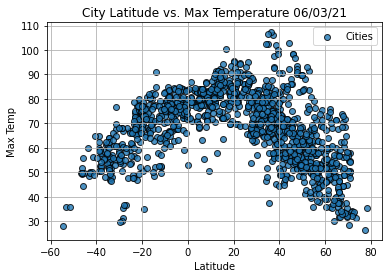

In [19]:
#Create scatter plot for latitude versus maximum temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolor="black", linewidths=1, marker="o",alpha=0.8,label="Cities")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.legend()
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

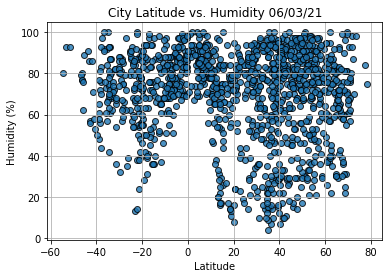

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

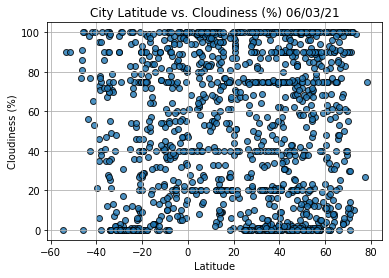

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()